# Summer 2022 Data Science Intern Challenge 

Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. 
We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. 
Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
shopify_data = pd.read_excel("C:/Users/dell/Desktop/intern.xlsx")

In [52]:
shopify_data.describe()
#From the analysis, it is seen that order_amount is highly skewed and there is a huge gap between minimum and maximum values.

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


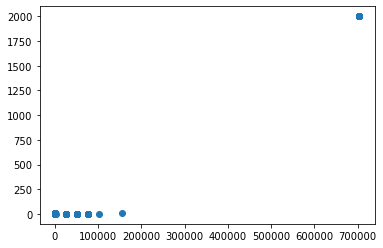

In [53]:
plt.scatter(shopify_data.order_amount,shopify_data.total_items)
#after visualizing a data i found that there is some outliners in the data

1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

--> After loading data, i have done some analysis on it and i found that order value have some high transaction with value of 704000. Here, we have calculated the average value of order value to measure central tendency. In normal circumstances where our data is normally distributed, it is recommanded to use mean value . However, in our case mean value is affected by the outliner. Hence, we need to use more reliable methods like median as it is not influence by extremely large values and trimmed mean where we trim the distribution of AOV.


2. What metric would you report for this dataset?

--> Here, i have used median and trimmed mean.

In [54]:
q3,q1 = np.percentile(shopify_data.order_amount,[97,3])

In [55]:
newdf = shopify_data[(shopify_data['order_amount'] < q3) & (shopify_data['order_amount'] > q1)]

3. What is its value?

--> With the help of 3% trimmed mean method we have obtained an AOV of 299.059$ which is lower than previous AOV. Morever, in the case of median, we have received 284 which is near to new AOV. 

In [56]:
print("Average Order Value is : " , newdf.order_amount.mean())

Average Order Value is :  299.05974304068525


In [57]:
print("Median of Order Value is : " , newdf.order_amount.median())

Median of Order Value is :  284.0
